# Reflect daily stats

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

from reflect.stats import SOLVE_DURATION_DIFFICULTY_BINS, load_firebase_events, compute_per_device_stats, compute_stats, load_features, merge_stats_and_features

## Playing stats

In [2]:
events_df = load_firebase_events()
device_df = compute_per_device_stats(events_df)
stats_df = compute_stats(events_df, device_df)
stats_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19
...,...,...,...,...,...,...,...,...,...
450,2024-07-08,28,25,20,80.000000,20.000000,226.9380,medium,2024-07-08
451,2024-07-09,24,21,20,95.238095,4.761905,62.1300,easy,2024-07-09
452,2024-07-10,25,20,18,90.000000,10.000000,47.3690,easy,2024-07-10
453,2024-07-11,22,21,21,100.000000,0.000000,25.0730,easy,2024-07-11


How many people are playing Reflect?

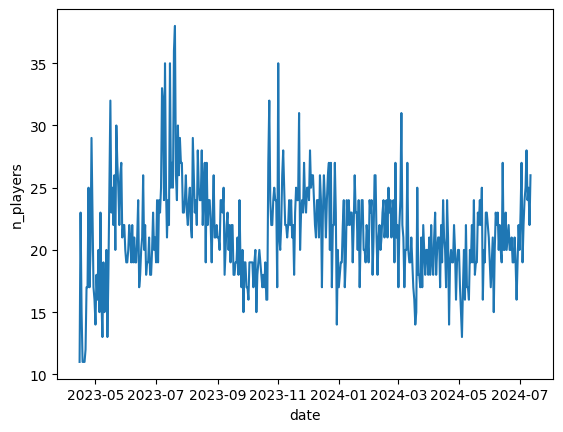

In [3]:
g = sns.lineplot(data=stats_df, x="date", y="n_players")

Total number of players ever (using devices as a proxy - of course the same person may have played on multiple devices)

In [4]:
len(events_df[events_df["name"] == "firstMove"]["device"].unique())

1374

## Features

In [5]:
features_df = load_features()
all_df = merge_stats_and_features(stats_df, features_df)
all_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date,filename,...,mean_beam_distance,max_beam_distance,total_beam_distance,excess_beam_distance,num_zero_reflection_blocks,excess_reflections,num_excess_reflection_beams,num_beam_edges,difficulty,setter_solve_duration_s
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15,puzzle-2023-04-15.txt,...,4.666667,10,28,6,0,2,1,10,4,NaN
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16,puzzle-2023-04-16.txt,...,4.833333,9,29,4,0,2,1,11,4,NaN
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17,puzzle-2023-04-17.txt,...,6.000000,8,30,4,0,6,2,10,4,NaN
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18,puzzle-2023-04-18.txt,...,4.000000,7,28,0,0,1,1,10,4,NaN
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19,puzzle-2023-04-19.txt,...,4.666667,8,28,0,0,1,1,9,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,2024-07-08,28,25,20,80.000000,20.000000,226.9380,medium,2024-07-08,puzzle-2024-07-08.txt,...,4.666667,8,28,2,0,2,1,9,5,inf
451,2024-07-09,24,21,20,95.238095,4.761905,62.1300,easy,2024-07-09,puzzle-2024-07-09.txt,...,5.200000,7,26,4,0,2,1,10,5,NaN
452,2024-07-10,25,20,18,90.000000,10.000000,47.3690,easy,2024-07-10,puzzle-2024-07-10.txt,...,4.166667,8,25,0,0,2,1,9,5,NaN
453,2024-07-11,22,21,21,100.000000,0.000000,25.0730,easy,2024-07-11,puzzle-2024-07-11.txt,...,5.800000,8,29,0,0,2,1,10,5,NaN


## Puzzle difficulty

First let's look at median solve durations (compare to the setter duration indicated by +).

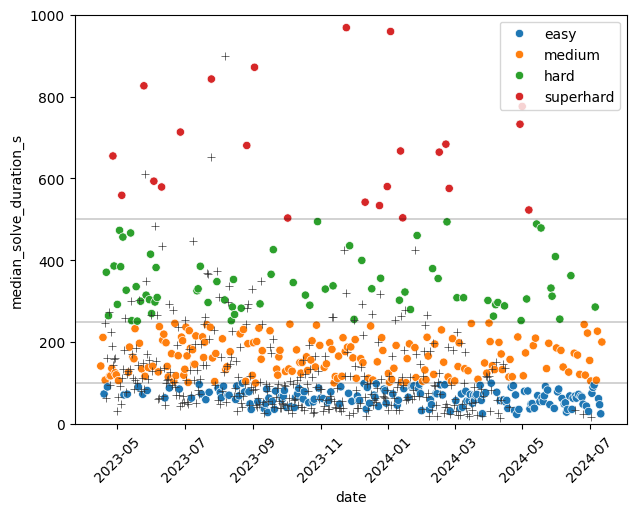

In [6]:
plt.ylim(0, 1000)
plt.xticks(rotation=45)
plt.tight_layout()

g = sns.scatterplot(data=all_df, x="date", y="median_solve_duration_s", hue="difficulty_duration")
sns.scatterplot(data=all_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[1], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[2], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[3], linewidth=0.25, color='k');

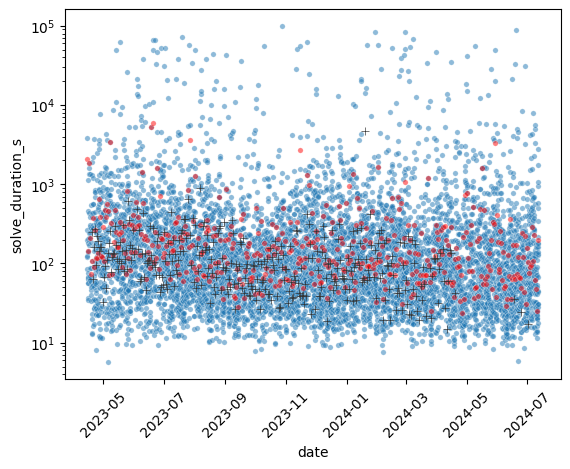

In [7]:
plt.xticks(rotation=45)
g = sns.scatterplot(data=device_df, x="date", y="solve_duration_s", s=15, alpha=0.5)
sns.scatterplot(data=all_df, x="date", y="median_solve_duration_s", s=15, alpha=0.5, color="red")
sns.scatterplot(data=all_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
g.set(yscale='log');

<Axes: xlabel='date', ylabel='failure_rate'>

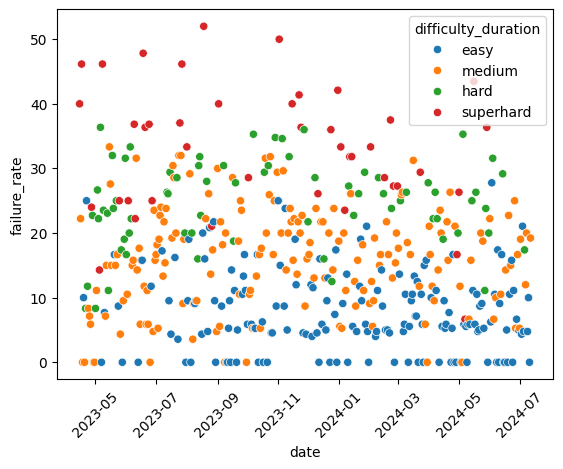

In [8]:
plt.xticks(rotation=45)
sns.scatterplot(data=stats_df, x="date", y="failure_rate", hue="difficulty_duration")

## Feature analysis

Let's see how features correlate with difficulty (as measured by `mean_solve_duration`)

In [9]:
all_df.columns

Index(['puzzle', 'n_players', 'n_started', 'n_solved', 'success_rate',
       'failure_rate', 'median_solve_duration_s', 'difficulty_duration',
       'date', 'filename', 'num_blocks', 'num_mirror_balls', 'num_beams',
       'num_reflections', 'mean_blocks_per_beam', 'max_blocks_per_beam',
       'num_multi_block_beams', 'mean_beams_per_block', 'max_beams_per_block',
       'num_double_reflect_blocks', 'mean_beam_distance', 'max_beam_distance',
       'total_beam_distance', 'excess_beam_distance',
       'num_zero_reflection_blocks', 'excess_reflections',
       'num_excess_reflection_beams', 'num_beam_edges', 'difficulty',
       'setter_solve_duration_s'],
      dtype='object')

In [10]:
feature_names = ['num_blocks', 'num_mirror_balls', 'num_beams', 'num_reflections',
       'mean_blocks_per_beam', 'max_blocks_per_beam', 'num_multi_block_beams',
       'mean_beams_per_block', 'max_beams_per_block',
       'num_double_reflect_blocks', 'mean_beam_distance', 'max_beam_distance',
       'total_beam_distance', 'excess_beam_distance', 'excess_reflections',
       'num_excess_reflection_beams']

In [11]:
all_df[["median_solve_duration_s", "failure_rate"] + feature_names].corr(numeric_only=True)\
    .sort_values("median_solve_duration_s", ascending=False)

,median_solve_duration_s,failure_rate,num_blocks,num_mirror_balls,num_beams,num_reflections,mean_blocks_per_beam,max_blocks_per_beam,num_multi_block_beams,mean_beams_per_block,max_beams_per_block,num_double_reflect_blocks,mean_beam_distance,max_beam_distance,total_beam_distance,excess_beam_distance,excess_reflections,num_excess_reflection_beams
median_solve_duration_s,1.000000,0.533635,0.091408,0.025403,0.102820,0.093041,0.034150,0.120442,0.043790,0.095705,0.112035,0.054377,-0.031842,0.038462,0.132539,0.142833,0.141201,0.115051
failure_rate,0.533635,1.000000,0.146740,0.043722,0.122422,0.077948,0.050283,0.138942,0.067379,0.097249,0.181551,-0.013176,-0.050748,0.135860,0.126649,0.278542,0.137568,0.115152
excess_beam_distance,0.142833,0.278542,-0.147172,-0.305927,-0.176488,0.236140,0.130349,0.172825,-0.033924,-0.017350,-0.161468,0.161106,0.335972,0.612803,0.274777,1.000000,0.026305,-0.050032
excess_reflections,0.141201,0.137568,0.287402,-0.214107,-0.163680,0.452599,0.401017,0.335509,-0.084388,-0.007946,-0.115199,0.304008,0.174017,0.033024,0.083674,0.026305,1.000000,0.797088
total_beam_distance,0.132539,0.126649,0.158671,0.058646,0.362913,0.271307,-0.198233,0.096529,0.029069,0.181460,-0.047669,0.310585,0.204244,0.287311,1.000000,0.274777,0.083674,0.027362
max_blocks_per_beam,0.120442,0.138942,0.085887,-0.221539,-0.100422,0.361386,0.262204,1.000000,-0.246725,0.066837,-0.064694,0.253640,0.129223,0.213651,0.096529,0.172825,0.335509,0.006280
num_excess_reflection_beams,0.115051,0.115152,0.271819,-0.052731,-0.031441,0.322927,0.344357,0.006280,0.059074,0.124509,0.129376,0.210900,0.002348,-0.144683,0.027362,-0.050032,0.797088,1.000000
max_beams_per_block,0.112035,0.181551,0.013542,0.489519,0.621858,-0.233301,-0.166249,-0.064694,0.285364,0.645935,1.000000,-0.254595,-0.667124,-0.296222,-0.047669,-0.161468,-0.115199,0.129376
num_beams,0.102820,0.122422,0.060235,0.795899,1.000000,-0.156294,-0.525788,-0.100422,0.192466,0.755367,0.621858,0.211989,-0.811874,-0.228584,0.362913,-0.176488,-0.163680,-0.031441
mean_beams_per_block,0.095705,0.097249,-0.171075,0.565559,0.755367,0.132912,-0.067686,0.066837,0.415358,1.000000,0.645935,0.469265,-0.681412,-0.207333,0.181460,-0.017350,-0.007946,0.124509


## Predictions over time

Train a model on data up to, but not including, date D, then use it to predict the solve duration on date D.

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
np.random.seed(42)

In [14]:
model_df = all_df[all_df["median_solve_duration_s"] < 1000] # remove outliers for model

In [15]:
feature_names = ['num_blocks', 'num_mirror_balls', 'num_beams',
        'num_reflections',
        'max_blocks_per_beam',
       'num_double_reflect_blocks', 'excess_reflections']

In [16]:
response_variable = "median_solve_duration_s"

In [17]:
predict_df = model_df.copy()
predict_df["predicted_solve_duration_s"] = np.nan

puzzles = model_df[model_df["puzzle"] >= "2023-05-01"]["puzzle"].tolist()

for puzzle in puzzles:
    train_df = model_df[model_df["puzzle"] < puzzle]
    X_train = train_df[feature_names]
    y_train = train_df[[response_variable]].values.ravel()

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    predicted_solve_duration_s = model.predict(model_df[model_df["puzzle"] == puzzle][feature_names])[0]

    predict_df.loc[predict_df['puzzle']==puzzle, ['predicted_solve_duration_s']] = predicted_solve_duration_s

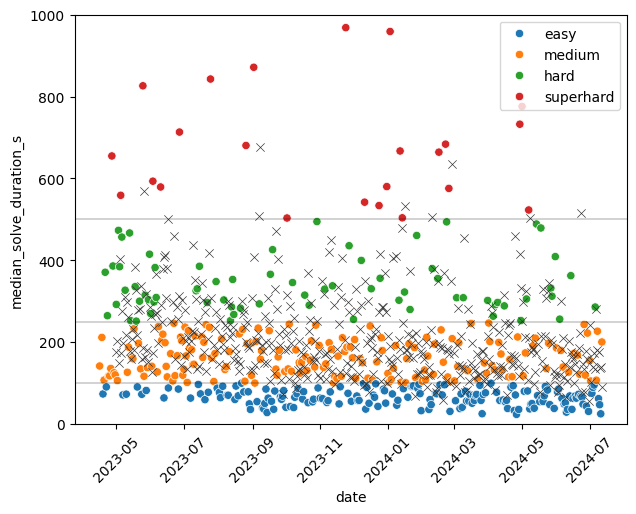

In [18]:
plt.ylim(0, 1000)
plt.xticks(rotation=45)
plt.tight_layout()

g = sns.scatterplot(data=predict_df, x="date", y="median_solve_duration_s", hue="difficulty_duration")
# sns.scatterplot(data=predict_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
sns.scatterplot(data=predict_df, x="date", y="predicted_solve_duration_s", color=".2", marker="x")

g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[1], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[2], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[3], linewidth=0.25, color='k');